In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
N=1000
X=np.random.random((N,2))*6 -3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

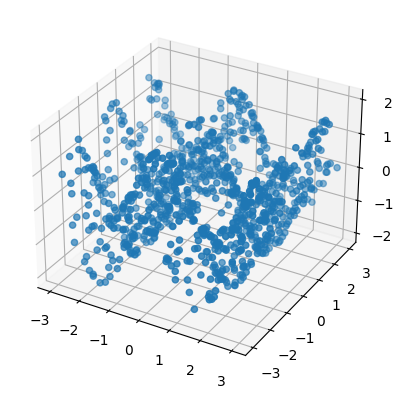

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

In [7]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss='mse')
r = model.fit(X,Y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.9756
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9286
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.9122
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9207
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.8538
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7840
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7156
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6451
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5963
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5737
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5698
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5352
Epoch 13/100
32/32 [================

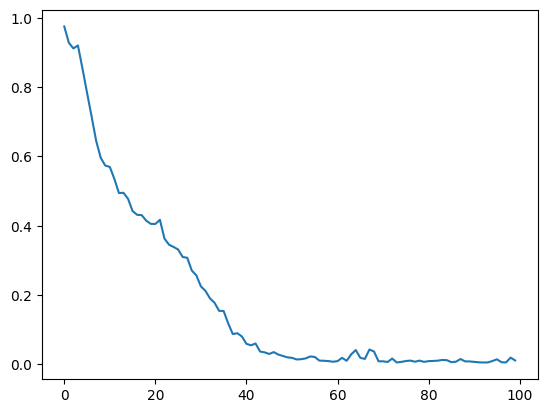

In [8]:
plt.plot(r.history['loss'],label='loss')

79/79 [==============================] - 1s 4ms/step


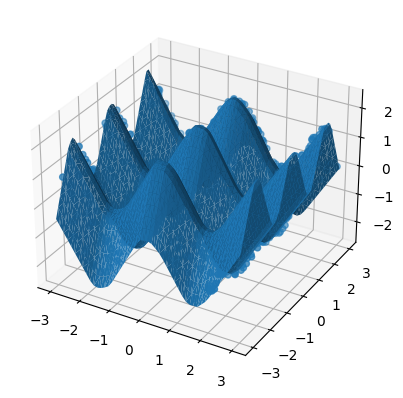

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat)

plt.show()

79/79 [==============================] - 0s 1ms/step


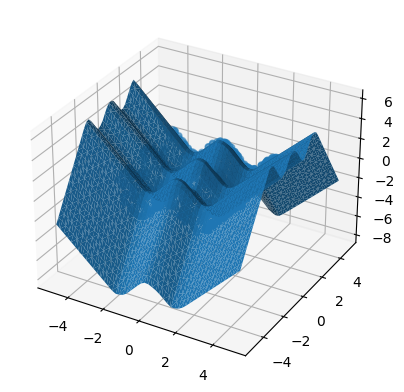

In [11]:
fig = plt.figure()
#can this extrapolate ??
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat)
## we know that cos is periodic and hence osciallations are periodic in the input
## but we 're not bale to preict this periodicity in the prediction bcause its not using a periodic activation function
plt.show()